In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Hypothesis Testing

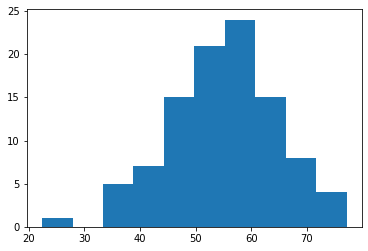

In [2]:
secret_numbers = (36^19, 19^25) # ^ is the bitwise XOR operator. We will use these "secret" numbers as the
                                # population mean and standard deviation for our example.
sampling_distribution = np.random.normal(secret_numbers[0], secret_numbers[1], 100)
plt.hist(sampling_distribution);

Let us assume we are trying to show that the true mean of the sampling distribution above is not 50. Because our sample size is greater than 30, the central limit theorem applies and we can run a z-test. Let us also assume an alpha significance level of 0.05.

$H_{0}$: The true mean of the sampling distribution is 50.

$H_{a}$: The true mean of the sampling distribution is not 50.

The p value for this hypothesis test is: 0.0000005681546449305


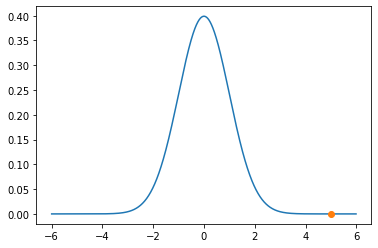

In [3]:
# P value calculation.
sample_mean = np.mean(sampling_distribution)
sample_size = len(sampling_distribution)
std_error = np.std(sampling_distribution, ddof=1) / (np.sqrt(sample_size))
z_score = (sample_mean - 50) / std_error
p_value = 2 * stats.norm.cdf(-abs(z_score))

# Plot z_score on normal distribution with mean 0 and std dev 1
plt.plot(np.arange(-6, 6, 0.01), stats.norm.pdf(np.arange(-6, 6, 0.01), 0, 1))
plt.plot(z_score, 0,  marker='o')

print("The p value for this hypothesis test is: {:20.19f}".format(p_value))

Because the p value is less than our significance level, we can reject our null hypothesis. If the true mean of the sampling distribution was 50, we would expect to see this result less than 5% of the time. We can say that we are confident 50 is not the true mean of the sampling distribution.

# Confidence Interval

We're confident that the true mean of the sampling distribution is not 50, but what is it?

Let's find a 90% confidence interval for the true mean of our sample distribution.

In [4]:
# The z score corresponding to 90% confidence interval
zc_score = stats.norm.ppf(1 - (1 - 0.90)/2)

max_value = sample_mean + (zc_score * std_error)
min_value = sample_mean - (zc_score * std_error)
print("Lower bound for the 90% confidence interval: {}".format(min_value))
print("Upper bound for the 90% confidence interval: {}".format(max_value))

Lower bound for the 90% confidence interval: 53.36362005275157
Upper bound for the 90% confidence interval: 56.659927176367034


# The True Mean and Std. Dev

In the real world, you won't know the true mean/std. dev of the underlying distribution. But just to prove we aren't messing with you, here are the secret numbers we used to generate our samples.

In [5]:
print("The true mean: {}".format(secret_numbers[0]))
print("The true std. dev: {}".format(secret_numbers[1]))

The true mean: 55
The true std. dev: 10
